# Go Ford Dataset 🔍
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

<a id='wrangle'></a>
# Data Wrangling 

In [20]:
%matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Using matplotlib backend: Qt5Agg


In [21]:
df = pd.read_csv("fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [22]:
df.shape

(183412, 16)

In [23]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

> Datetime columns type need to be fixed.

In [24]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [25]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> Given that the dataset is huge 180k+ rows and the null cells are only around 8k we can eliminate them.

In [26]:
df.dropna(inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [27]:
df.shape

(174952, 16)

In [28]:
df.duplicated().sum()

0

In [29]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Univarient Visualization

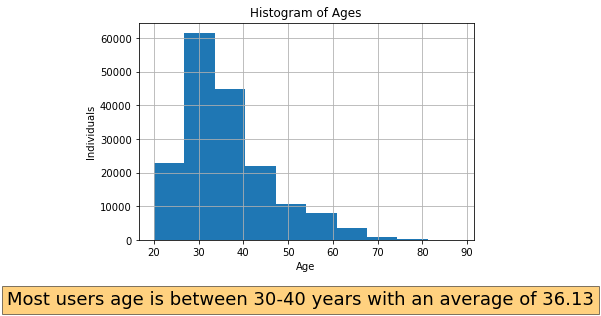

In [30]:
# calculating age from birth year

df["age"] = 2021 - df["member_birth_year"]
df["age"] = df.loc[df["age"] < 90,"age"]
df["age"].hist()
plt.title("Histogram of Ages")
plt.xlabel("Age")
plt.ylabel("Individuals")
finding = "Most users age is between 30-40 years with an average of " + str(round(df["age"].mean(),2))
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

## How old are the participants?
> Between 30-40 with an average of 36.

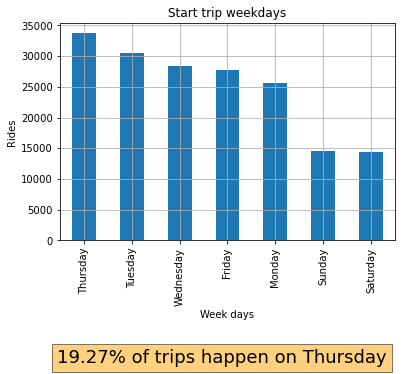

In [31]:
# getting start weekday name for each trip

df["start_dayofweek"] = df["start_time"].dt.day_name()
df["start_dayofweek"].value_counts().plot(kind="bar", grid=True)
plt.title("Start trip weekdays")
plt.xlabel("Week days")
plt.ylabel("Rides")
finding = "{}% of trips happen on Thursday".format(round(df["start_dayofweek"].value_counts()["Thursday"]/ df.shape[0] * 100, 2))
plt.figtext(0.5, -0.3, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

## At what day of week most trips start in?
> Around 20% of trips start Thursday.

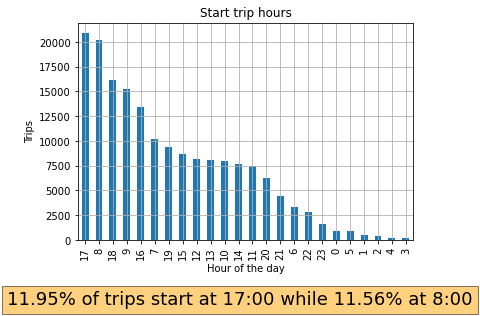

In [32]:
# getting start hour of day for each trip

df["start_hourofday"] = df["start_time"].dt.hour
df["start_hourofday"].value_counts().plot(kind="bar", grid=True)
plt.title("Start trip hours")
plt.xlabel("Hour of the day")
plt.ylabel("Trips")
ratio_17 = round(df["start_hourofday"].value_counts()[17]/df.shape[0] *100,2)
ratio_8 = round(df["start_hourofday"].value_counts()[8]/df.shape[0] *100,2)
finding = "{}% of trips start at 17:00 while {}% at 8:00".format(ratio_17,ratio_8)
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

## At what time most trips start at?
> Most trips start at 17:00 and 8:00.

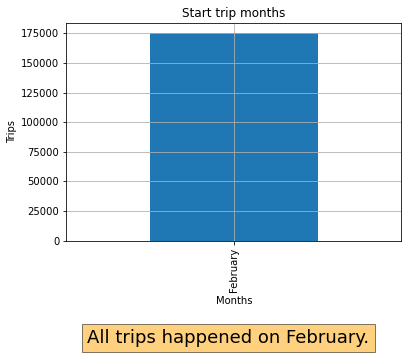

In [33]:
# getting start month name for each trip

df["start_month"] = df["start_time"].dt.month_name()
df["start_month"].value_counts().plot(kind="bar", grid=True)
plt.title("Start trip months")
plt.xlabel("Months")
plt.ylabel("Trips")
finding = "All trips happened on February."
plt.figtext(0.5, -0.23, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

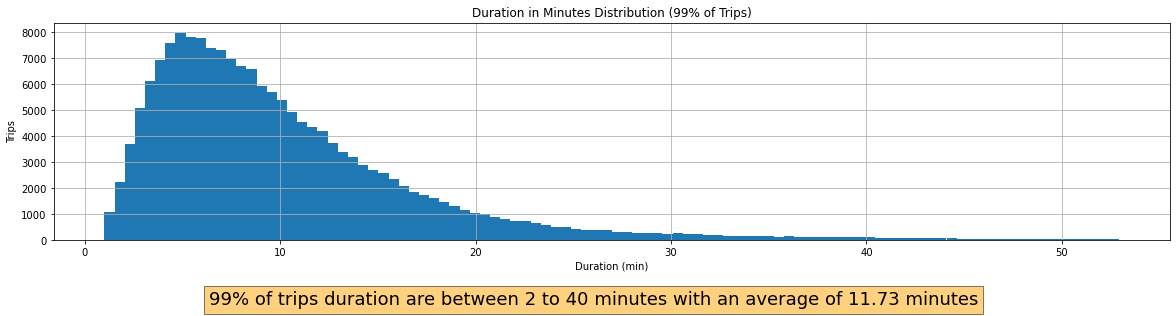

In [34]:
# calculating duration in minutes and plotting 99% of trips distribution

df["duration_min"] = df["duration_sec"] / 60
df.loc[df["duration_min"] < df["duration_min"].quantile(q=0.99) ,"duration_min"].hist(bins=100, figsize=(20,4))
plt.title("Duration in Minutes Distribution (99% of Trips)")
plt.xlabel("Duration (min)")
plt.ylabel("Trips")
avg_duration = round(df["duration_min"].mean(),2)
finding = "99% of trips duration are between 2 to 40 minutes with an average of {} minutes".format(avg_duration)
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

## How long do trips take?
> 99% of trips duration are between 2-40 minutes with an average of around 12 minutes.

In [35]:
# calculating distance from latitude and longitude.

R = 6373.0

lat1 = df["start_station_latitude"].to_numpy()
lat2 = df["end_station_latitude"].to_numpy() 

lon1 = df["start_station_longitude"].to_numpy()
lon2 = df["end_station_longitude"].to_numpy()


# calculating distance 

dlon = lon2 - lon1
dlat = lat2 - lat1

a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan(np.sqrt(a), np.sqrt(1 - a))

distance = R * c

df["distance_taveled"] = distance

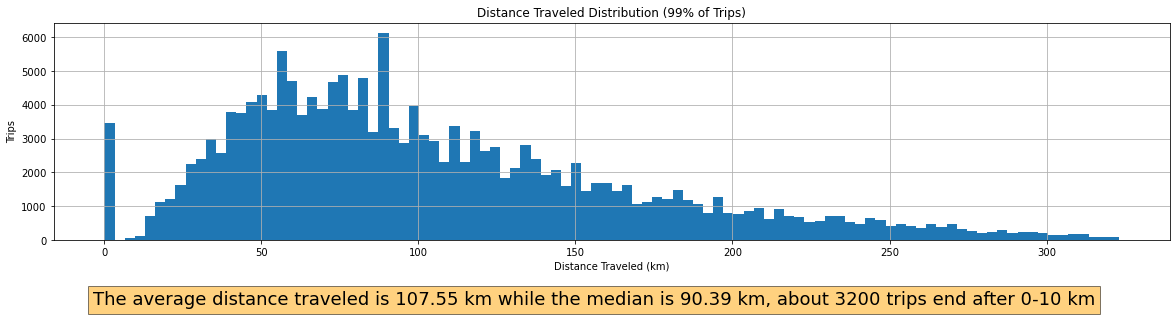

In [36]:
# plotting distance traveled of 99% of trips distribution

df.loc[df["distance_taveled"] < df["distance_taveled"].quantile(q=0.99) ,"distance_taveled"].hist(bins=100, figsize=(20,4))
plt.title("Distance Traveled Distribution (99% of Trips)")
plt.xlabel("Distance Traveled (km)")
plt.ylabel("Trips")
avg_distance = round(df["distance_taveled"].mean(),2)
median_distance = round(df["distance_taveled"].median(),2)
finding = "The average distance traveled is {} km while the median is {} km, about 3200 trips end after 0-10 km".format(avg_distance, median_distance)
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

## How long the distance traveled are on average?
> 99% of trips travel a distance of 100 km on average.

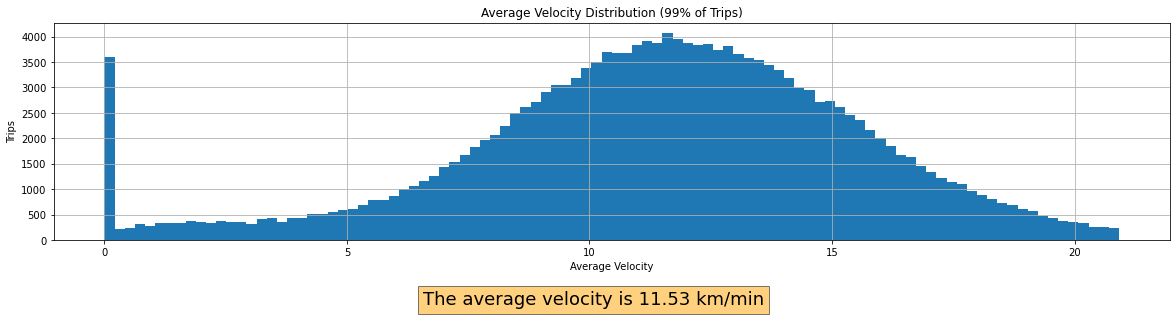

In [37]:
# calculating average velocity and plotting of 99% of trips distribution

df["average_velocity"] = df["distance_taveled"] / df["duration_min"]
df.loc[df["average_velocity"] < df["average_velocity"].quantile(q=0.99) ,"average_velocity"].hist(bins=100, figsize=(20,4))
plt.title("Average Velocity Distribution (99% of Trips)")
plt.xlabel("Average Velocity")
plt.ylabel("Trips")
avg_velocity = round(df["average_velocity"].mean(),2)
finding = "The average velocity is {} km/min".format(avg_velocity)
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

## How fast the rides are on average?
> I first calculated distance traveled in km and divided it by the duration taken in mins. I plotted it using a histogram of 99% of trips to see the velocity distribution. There is a spike at low velocities which indicate either a short distance traveled or a very long duration taken for a short distance, this indicate that most participant don't continue their trips.

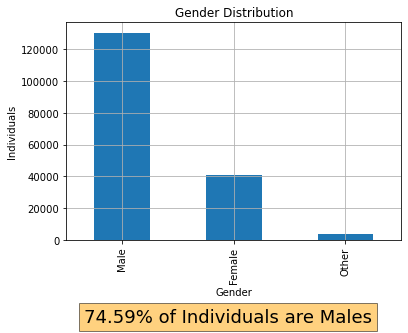

In [38]:
# geneder distribution

df["member_gender"].value_counts().plot(kind="bar", grid=True)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Individuals")
male_prec = round(df["member_gender"].value_counts()["Male"]/ df.shape[0] * 100,2)
finding = "{}% of Individuals are Males".format(male_prec)
plt.figtext(0.5, -0.16, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

# Bivarient Visualiation

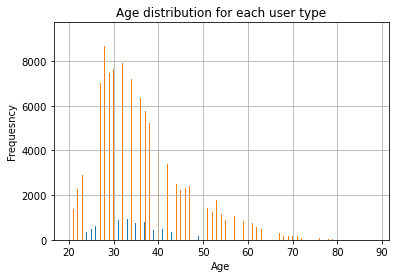

In [39]:
# age distribution for each user type

df.loc[(df["user_type"] == "Customer"), "age"].hist(bins=500)
df.loc[(df["user_type"] == "Subscriber"), "age"].hist(bins=500)
plt.title("Age distribution for each user type")
plt.xlabel("Age")
plt.ylabel("Frequesncy")
plt.show()

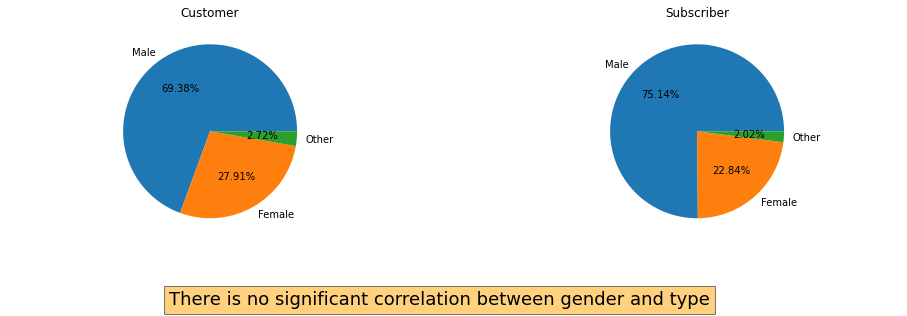

In [40]:
# geneder distribution for each user type

male_customer = df[(df["user_type"] == "Customer") & (df["member_gender"] == "Male")].shape[0]
male_subscriber = df[(df["user_type"] == "Subscriber") & (df["member_gender"] == "Male")].shape[0]

female_customer = df[(df["user_type"] == "Customer") & (df["member_gender"] == "Female")].shape[0]
female_subscriber = df[(df["user_type"] == "Subscriber") & (df["member_gender"] == "Female")].shape[0]

other_customer = df[(df["user_type"] == "Customer") & (df["member_gender"] == "Other")].shape[0]
other_subscriber = df[(df["user_type"] == "Subscriber") & (df["member_gender"] == "Other")].shape[0]

fig, ax = plt.subplots(1,2, figsize=(16, 4))

ax[0].axis('equal')
ax[0].pie([male_customer, female_customer, other_customer], labels=["Male", "Female", "Other"], autopct='%1.2f%%') 
ax[0].set_title("Customer")   

ax[1].axis('equal')
ax[1].pie([male_subscriber, female_subscriber, other_subscriber], labels=["Male", "Female", "Other"], autopct='%1.2f%%') 
ax[1].set_title("Subscriber")

finding = "There is no significant correlation between gender and type"
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

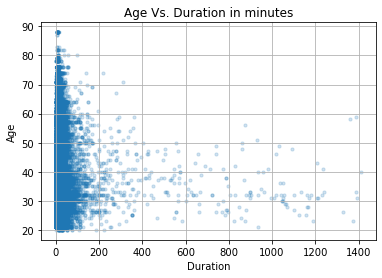

In [41]:
# average distribution

plt.scatter(df["duration_min"], df["age"], alpha =0.2, s=10)
plt.title("Age Vs. Duration in minutes")
plt.xlabel("Duration")
plt.ylabel("Age")
plt.grid(True)
plt.show()

## Does duration of trips reflect riders age?
> I used a scatter plot to show at what age does the duaration of trips decrease and as shown here, those who ride long trips more than 350 mins are less than 60 years old.

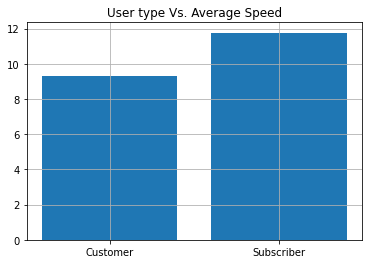

In [42]:
# average velocity of each user type

average_cust_velocity = df.loc[df["user_type"] == "Customer" ,"average_velocity"].mean() 
average_sub_velocity = df.loc[df["user_type"] == "Subscriber","average_velocity"].mean() 
speeds = [average_cust_velocity, average_sub_velocity]
genders = ["Customer", "Subscriber"]
plt.bar(genders, speeds)
plt.grid(True)
plt.title("User type Vs. Average Speed")
plt.show()

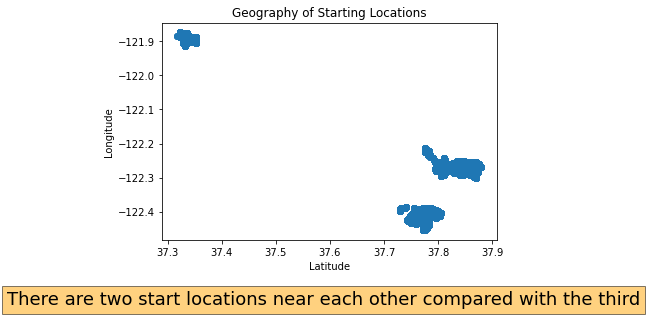

In [43]:
# geography of trips end points locations

plt.scatter(df["start_station_latitude"], df["start_station_longitude"])
plt.title("Geography of Starting Locations")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
finding = "There are two start locations near each other compared with the third"
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

# Multivarient Visualization

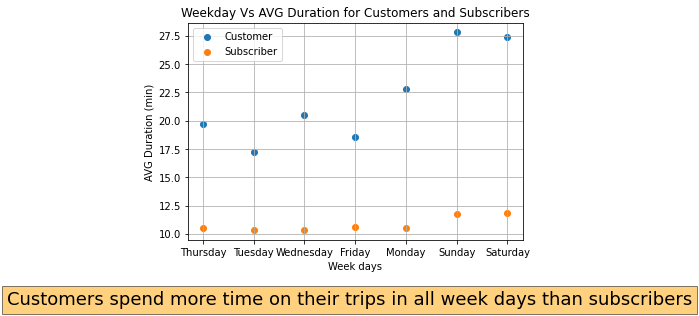

In [44]:
# trip duration for each weekday for each user type

dayofweek = df["start_dayofweek"].value_counts().keys().to_numpy()
avg_duration_per_week_customer={}
avg_duration_per_week_subscriber={}

for weekday in dayofweek:
    avg_duration_per_week_customer[weekday] = round(df.loc[(df["start_dayofweek"] == weekday) & (df["user_type"] == "Customer"),"duration_min"].mean(),2)

for weekday in dayofweek:
    avg_duration_per_week_subscriber[weekday] = round(df.loc[(df["start_dayofweek"] == weekday) & (df["user_type"] == "Subscriber"),"duration_min"].mean(),2)
    
plt.scatter(avg_duration_per_week_customer.keys(), avg_duration_per_week_customer.values())
plt.scatter(avg_duration_per_week_subscriber.keys(), avg_duration_per_week_subscriber.values())

plt.legend(labels =["Customer","Subscriber"])
plt.grid(True)
plt.title("Weekday Vs AVG Duration for Customers and Subscribers")
plt.xlabel("Week days")
plt.ylabel("AVG Duration (min)")
finding = "Customers spend more time on their trips in all week days than subscribers"
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

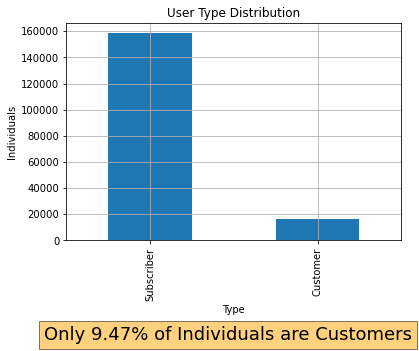

In [45]:
# user type distribution

df["user_type"].value_counts().plot(kind="bar", grid=True)
plt.title("User Type Distribution")
plt.xlabel("Type")
plt.ylabel("Individuals")
cust_prec = round(df["user_type"].value_counts()["Customer"]/ df.shape[0] * 100,2)
finding = "Only {}% of Individuals are Customers".format(cust_prec)
plt.figtext(0.5, -0.22, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

## How long each user type ride for each weekday?
> We need to take in consideration the original distribution of user type. So I plotted the user type distribution along with average duration of the trip with each weekday. Customers spend more time on their trips for all weekdays on average.

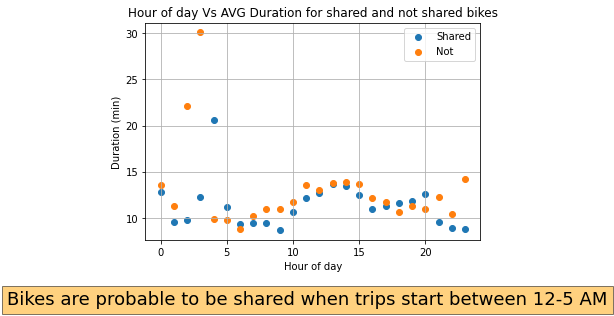

In [46]:
# trip duration for each hour in a day for each user type

hourofday = df["start_hourofday"].value_counts().keys().to_numpy()
avg_duration_per_week_customer={}
avg_duration_per_week_subscriber={}

for hour in hourofday:
    avg_duration_per_week_customer[hour] = round(df.loc[(df["start_hourofday"] == hour) & (df["bike_share_for_all_trip"] == "Yes"), "duration_min"].mean(),2)

for hour in hourofday:
    avg_duration_per_week_subscriber[hour] = round(df.loc[(df["start_hourofday"] == hour) & (df["bike_share_for_all_trip"] == "No"), "duration_min"].mean(),2)
    
plt.scatter(avg_duration_per_week_customer.keys(), avg_duration_per_week_customer.values())
plt.scatter(avg_duration_per_week_subscriber.keys(), avg_duration_per_week_subscriber.values())

plt.legend(labels =["Shared", "Not"])
plt.grid(True)
plt.title("Hour of day Vs AVG Duration for shared and not shared bikes")
plt.xlabel("Hour of day")
plt.ylabel("Duration (min)")
finding = "Bikes are probable to be shared when trips start between 12-5 AM"
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

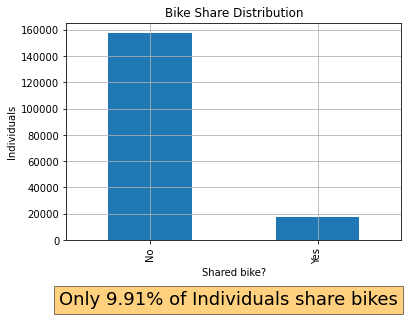

In [47]:
# how many trips shared bikes

df["bike_share_for_all_trip"].value_counts().plot(kind="bar", grid=True)
plt.title("Bike Share Distribution")
plt.xlabel("Shared bike?")
plt.ylabel("Individuals")
share_prec = round(df["bike_share_for_all_trip"].value_counts()["Yes"]/ df.shape[0] * 100,2)
finding = "Only {}% of Individuals share bikes".format(share_prec)
plt.figtext(0.5, -0.1, finding, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

## At what times bikes are more likely to be shared for each trip duration?
> We need to take in consideration the original distribution of the shared bikes. So I plotted the shared bikes distribution along with a plot that describes the relation between the duration of the trip with the starting hour of the day. Bikes are more likely to be shared in small trips around 12-5 AM for short duration trips.